# <b>DS3000 Group Project</b>

# <b>Chef.AI</b> - Lukas Bozinov & Arjun Atwal - Group 31

## Section 0 - Preliminary Code

### Section 0.1: Import all necessary libraries

In [1]:
import numpy as np #etc etc etc
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score
import csv, ast, math

### Section 0.2: Other things

In [2]:
print('balls in 3D')

balls in 3D


## Section 1 - Organization of Dataset

### Section 1.1: Parse the dataset
Formatting data into a format that is easily passed to math functions.

In [3]:
# written by lukas (i am the goat)

class Food:
    def __init__(self, food_name, food_group, colour_day, mass_day, temp_day):
        self.food_name = food_name
        self.food_group = food_group
        self.colour_day = colour_day
        self.mass_day = mass_day
        self.temp_day = temp_day

    def __str__(self):
        return (
            f"Food Name: {self.food_name}\n"
            f"Food Group: {self.food_group}\n"
            f"Colour (RGB) by Day: {self.colour_day}\n"
            f"Mass (grams) by Day: {self.mass_day}\n"
            f"Temperature (degrees C) by Day: {self.temp_day}\n"
        )

foodList_train = []

with open('ourData.csv', "r") as commentedFile: 
    reader = csv.reader(commentedFile)
    next(reader)  # skip line of headers

    for row in reader:
        food_name = row[0].strip()
        food_group = row[1].strip()
        colour_day_raw = row[2].strip()
        mass_day_raw = row[3].strip()
        temp_day_raw = row[4].strip()

        colour_day_list = ast.literal_eval(colour_day_raw)
        mass_day_list = ast.literal_eval(mass_day_raw)
        temp_day_list = ast.literal_eval(temp_day_raw)

        # Use lists instead of dictionaries because duplicate values erases entries that we need
        colour_day = colour_day_list
        mass_day = mass_day_list
        temp_day = temp_day_list

        food = Food(food_name, food_group, colour_day, mass_day, temp_day)

        foodList_train.append(food)

# get total number of days for later processing
numDays_train = len(foodList_train[0].colour_day)
print('food name:', foodList_train[0].food_name)

#TEST

foodList_test = []

with open('ourDataTest.csv', "r") as commentedFile: 
    reader = csv.reader(commentedFile)
    next(reader)  # skip line of headers

    for row in reader:
        food_name = row[0].strip()
        food_group = row[1].strip()
        colour_day_raw = row[2].strip()
        mass_day_raw = row[3].strip()
        temp_day_raw = row[4].strip()

        colour_day_list = ast.literal_eval(colour_day_raw)
        mass_day_list = ast.literal_eval(mass_day_raw)
        temp_day_list = ast.literal_eval(temp_day_raw)

        # Use lists instead of dictionaries because duplicate values erases entries that we need
        colour_day = colour_day_list
        mass_day = mass_day_list
        temp_day = temp_day_list

        food = Food(food_name, food_group, colour_day, mass_day, temp_day)

        foodList_test.append(food)

# get total number of days for later processing
numDays_test = len(foodList_test[0].colour_day)
print('food name:', foodList_test[0].food_name)



food name: Apple
food name: Apple


### Section 1.2: Data Pre-Processing
Passing Data to math functions to create mass factors

In [4]:
# import deez

def freshness_index(time, mass_initial, mass_curr, temp_curr, temp_optimal, color_curr, color_optimal, weight_mass = 0.5, weight_temp = 0.3, weight_color = 0.2, alpha = 0.3, sigma = 5, lambda_ = 0.05):

    # Mass Factor - not certain about this
    mass_factor = (math.exp(-alpha * time * (mass_curr / mass_initial))) * weight_mass
    # print(mass_factor)

    # Temperature Factor
    temp_factor = math.exp(-((temp_curr - temp_optimal) ** 2) / (2 * sigma ** 2)) * weight_temp
    # print(temp_factor)

    # Color Factor - asm color_curr, color_optimal are in range RGB(0-255, 0-255, 0-255)
    color_diff = math.sqrt((color_curr[0] - color_optimal[0]) ** 2 + (color_curr[1] - color_optimal[1]) ** 2 + (color_curr[2] - color_optimal[2]) ** 2)
    color_factor = math.exp(-lambda_ * color_diff) * weight_color
    # print(color_factor)

    # Freshness Index
    freshness_index = mass_factor + temp_factor + color_factor
    return min(1, freshness_index) # with the weights summing to 1, the maximum value of the freshness index is 1

# which food are we looking at
for i in range(len(foodList_train)): # print all options
    print(foodList_train[i].food_name)
food_name = input('\nEnter the name of the food you would like to analyze: ')

# find the food object
food = None
for i in range(len(foodList_train)):
    if foodList_train[i].food_name == food_name:
        food = foodList_train[i]
        break

if food == None:
    print('Food not found')
    exit()

# find the index of the food object
food_index = foodList_train.index(food)

# initialize optimal values for the freshness_index function
color_optimal = (foodList_train[food_index].colour_day[0][0])
temp_optimal = foodList_train[food_index].temp_day[0][0]
mass_initial = foodList_train[food_index].mass_day[0][0]

days = []
for i in range(numDays_train):
    days.append(i)

    #freshness_values = np.array([1.0, 0.710923868536591, 0.63709970475181, 0.511606076772564, 0.44434784966860497, 0.40576335646495826, 0.381205757697219])

days = np.array(days)

freshness_values_train = []

for i in range(numDays_train):
    color_curr = (foodList_train[food_index].colour_day[i][0])
    temp_curr = foodList_train[food_index].temp_day[i][0]
    mass_curr = foodList_train[food_index].mass_day[i][0]
    time = i

    print('Time =', time)
    freshnessindex_train = freshness_index(time, mass_initial, mass_curr, temp_curr, temp_optimal, color_curr, color_optimal)
    print(freshnessindex_train)
    freshness_values_train.append(freshnessindex_train)

freshness_values_train = np.array(freshness_values_train)

print(days)
print(freshness_values_train)

#TEST

# which food are we looking at
for i in range(len(foodList_test)): # print all options
    print(foodList_test[i].food_name)
food_name = input('\nEnter the name of the food you would like to analyze: ')

# find the food object
food = None
for i in range(len(foodList_test)):
    if foodList_test[i].food_name == food_name:
        food = foodList_test[i]
        break

if food == None:
    print('Food not found')
    exit()

# find the index of the food object
food_index = foodList_test.index(food)

# initialize optimal values for the freshness_index function
color_optimal = (foodList_test[food_index].colour_day[0][0])
temp_optimal = foodList_test[food_index].temp_day[0][0]
mass_initial = foodList_test[food_index].mass_day[0][0]

days_test = []
for i in range(numDays_test):
    days_test.append(i)

    #freshness_values = np.array([1.0, 0.710923868536591, 0.63709970475181, 0.511606076772564, 0.44434784966860497, 0.40576335646495826, 0.381205757697219])

days_test = np.array(days_test)

freshness_values_test = []

for i in range(numDays_test):
    color_curr = (foodList_test[food_index].colour_day[i][0])
    temp_curr = foodList_test[food_index].temp_day[i][0]
    mass_curr = foodList_test[food_index].mass_day[i][0]
    time = i

    print('Time =', time)
    freshnessindex_test = freshness_index(time, mass_initial, mass_curr, temp_curr, temp_optimal, color_curr, color_optimal)
    print(freshnessindex_test)
    freshness_values_test.append(freshnessindex_test)

freshness_values_test = np.array(freshness_values_test)

print(days_test)
print(freshness_values_test)



Apple
Blueberry
Cherry Tomato
Naan Bread
Celery
Iceberg Lettuce
Red Grapes
White Bread
Ground Beef
Chicken Breasts
Swiss Cheese
Plain Yogurt
Pineapple
Time = 0
1
Time = 1
0.710923868536591
Time = 2
0.63709970475181
Time = 3
0.511606076772564
Time = 4
0.44434784966860497
Time = 5
0.40576335646495826
Time = 6
0.381205757697219
[0 1 2 3 4 5 6]
[1.         0.71092387 0.6370997  0.51160608 0.44434785 0.40576336
 0.38120576]
Apple
Blueberry
Cherry Tomato
Naan Bread
Celery
Iceberg Lettuce
Red Grapes
White Bread
Ground Beef
Chicken Breasts
Swiss Cheese
Plain Yogurt
Pineapple
Time = 0
1
Time = 1
0.7131630360573626
Time = 2
0.6425531404188921
Time = 3
0.4948446994286173
Time = 4
0.46135035350384773
Time = 5
0.38234044107776954
Time = 6
0.380944703280409
[0 1 2 3 4 5 6]
[1.         0.71316304 0.64255314 0.4948447  0.46135035 0.38234044
 0.3809447 ]


## Section 2 - Mathematical Function Initialization

### Section 2.1: Sigmoid Function Declaration

Mean Squared Error on Training Data: 0.0021799152575388524
Mean Squared Error on Test Data: 0.23929145801059296
R^2 on Training Data: 0.9473125743640247
R^2 on Test Data: -4.6203032747106105
Day when freshness index is closest to 0.8: 1.1313131313131313
Day when freshness index is closest to 0.6: 2.2626262626262625
Day when freshness index is closest to 0.4: 4.525252525252525


/var/folders/yn/mrj5wlcn5413qz7236tzylpm0000gn/T/ipykernel_39031/2407620595.py:7: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (t - t_0)))


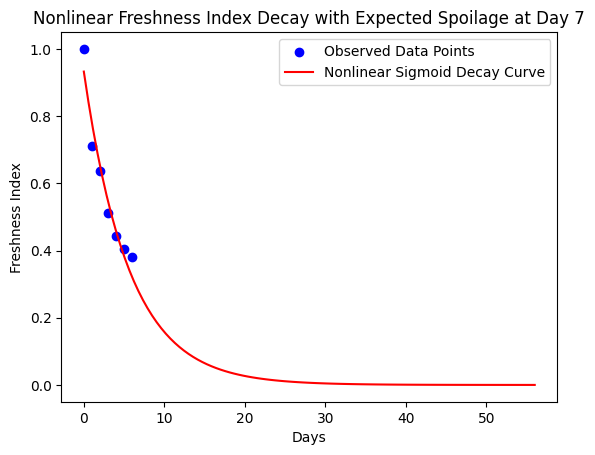

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score

def freshness_sigmoid_model(t, L, k, t_0):
    return L / (1 + np.exp(-k * (t - t_0)))

# Assuming days, days_test, freshness_values_train, and freshness_values_test are already defined. 
days_train = days
freshness_train = freshness_values_train
days_test = days_test
freshness_test = freshness_values_test

def sigmoid_model_regression():

    # Provide initial parameter guesses and increase maxfev
    initial_guesses = [1, 1, 12]

    params, covariance = curve_fit(
        freshness_sigmoid_model,
        days_train,
        freshness_train,
        p0=initial_guesses,
        maxfev=20000
    )

    L, k, t_0 = params

    predicted_train = freshness_sigmoid_model(days_train, L, k, t_0)
    predicted_test = freshness_sigmoid_model(days_test, L, k, t_0)

    mse_train = mean_squared_error(freshness_train, predicted_train)
    mse_test = mean_squared_error(freshness_test, predicted_test)

    print(f"Mean Squared Error on Training Data: {mse_train}")
    print(f"Mean Squared Error on Test Data: {mse_test}")

    r2_train = r2_score(freshness_train, predicted_train)
    r2_test = r2_score(freshness_test, predicted_test)

    print(f"R^2 on Training Data: {r2_train}")
    print(f"R^2 on Test Data: {r2_test}")

    days_extended = np.linspace(0, 56, 100)
    predicted_freshness = freshness_sigmoid_model(days_extended, L, k, t_0)

    # Find the day when the freshness index equals 0.8, 0.6, and 0.4
    target_values = [0.8, 0.6, 0.4]
    target_days = {}

    for target in target_values:
        closest_day = None
        closest_diff = float('inf')
        for i in range(len(predicted_freshness)):
            diff = abs(predicted_freshness[i] - target)
            if diff < closest_diff:
                closest_diff = diff
                closest_day = days_extended[i]
        target_days[target] = closest_day

    for target, day in target_days.items():
        print(f"Day when freshness index is closest to {target}: {day}")

    plt.scatter(days, freshness_values_train, color='blue', label='Observed Data Points')
    plt.plot(days_extended, predicted_freshness, color='red', label='Nonlinear Sigmoid Decay Curve')
    plt.xlabel('Days')
    plt.ylabel('Freshness Index')
    plt.title('Nonlinear Freshness Index Decay with Expected Spoilage at Day 7')
    plt.legend()
    plt.show()

sigmoid_model_regression()

### Section 2.2: Life coach for meals so i guess just the chef part?

In [6]:
# take target_days which contains the days when the freshness index is closest to 0.8, 0.6, and 0.4
# these are our categories, anything before 0.8 is good to eat, anything between 0.8 and 0.6 is okay to eat, and anything after 0.6 is bad to eat
# loop the above for all foods (or however many we wish to analyze) and store the results in a dictionary or something
# then, simply go week by week
# optimize meal planning based on this information



more math


## Section 3 - Modelling

### Section 3.1: Load data into model

In [7]:
print('LOAD IT MAN')

LOAD IT MAN


### Section 3.2: Fit model

In [8]:
print('model.fit go brrrrr')

model.fit go brrrrr


### Section 3.3: Evaluate accuracy

In [9]:
print('auroc man idk')

auroc man idk


## Section 4 - Visualization

### Section 4.1: Line graph

In [10]:
print('something something matplotlib')

something something matplotlib


### Section 4.2: Other visualization

In [11]:
print('something something seaborn')

something something seaborn


## Section 5 - Comparisons to other models (?)

### Section 5.1: Comparison to linear regression

In [12]:
print('news flash: linear regression sucks')

news flash: linear regression sucks


## Section 6 - Conclusions to draw

In [13]:
print('overall, our model is better than the other one')

overall, our model is better than the other one
